In [1]:
# Download the dataset:
import platform
mysystem = platform.system()
file_id = '10PSeKeL3aUA56faRhr4ZfkEPcVtKjlry'
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id
# Check if system is Windows
if mysystem != 'Windows':
    !wget -O dataset.csv --no-check-certificate "$file_download_link"
    # !unzip data.zip

print('Please download the data using the following link:', file_download_link)

--2022-11-28 02:32:49--  https://docs.google.com/uc?export=download&id=10PSeKeL3aUA56faRhr4ZfkEPcVtKjlry
Resolving docs.google.com (docs.google.com)... 142.251.167.100, 142.251.167.113, 142.251.167.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.167.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ci9oh226n9ach78hohmii41rk5asi0tp/1669602750000/16176821467984544774/*/10PSeKeL3aUA56faRhr4ZfkEPcVtKjlry?e=download&uuid=4131fdec-b562-40d6-8aca-d161b664fb66 [following]
--2022-11-28 02:32:52--  https://doc-04-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ci9oh226n9ach78hohmii41rk5asi0tp/1669602750000/16176821467984544774/*/10PSeKeL3aUA56faRhr4ZfkEPcVtKjlry?e=download&uuid=4131fdec-b562-40d6-8aca-d161b664fb66
Resolving doc-04-50-docs.googleusercontent.com (doc-04-50-docs.googleusercontent.com)... 142.251.16.132, 2607:f

In [2]:
#For Our Group's Convenience: Mount Google Drive to access the dataset from there instead
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
#Libraries
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
#Read in dataset
df = pd.read_csv('dataset.csv')
# df = df.sample(n= 80000, random_state=21)

#Remove unhelpful columns
df_rem = df.drop(columns=['Unnamed: 0', 'track_id','track_name','explicit'])

In [5]:
#At first, our goal was to predict popularity over all genres.
#We realized this was a flawed  genre makes too big a difference.
#E.g., 2 songs might be equally popular, but they might be completely different in all other aspects simply because they are in different genres.
#We decided to examine a single genre, and these 2 cells are a remnant of our inital approch.

# label encoding the generes
# df_rem['track_genre'].unique()
# df_rem['track_genre'] = label_encoder.fit_transform(df_rem['track_genre'])
# #spiltting the a row with multiple artite=s into multiple rows

# df_rem = (df_rem.set_index(['album_name', 'popularity', 'duration_ms', 'danceability', 'energy',
#        'key', 'loudness', 'mode', 'speechiness', 'acousticness',
#        'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
#        'track_genre'])
#    .apply(lambda x: x.str.split(';').explode())
#    .reset_index())

In [6]:
# label encoding the generes
# df_rem['artists'].unique().size
# 6533
# df_rem['artists'] = label_encoder.fit_transform(df_rem['artists'])
# df_rem.shape
# (11023, 17)
# df_rem

In [7]:
#All genres in dataset
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [8]:
#Limit dataset to a single genre
df_rem = df_rem.loc[df_rem['track_genre'] == 'party']

#Popularity scores found in "party" genre
df['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [9]:
display(df_rem)

,artists,album_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
78000,Harris & Ford;2 Engel & Charlie,Layla sitzt dicht im Flieger,2,126133,0.702,0.839,6,-3.954,0,0.0744,0.02320,0.000261,0.0932,0.348,112.516,1,party
78001,Die Zipfelbuben;DJ Cashi,Ballermann Party Hits Megamix 2022.2,0,180157,0.666,0.942,1,-2.928,1,0.0689,0.03070,0.000000,0.2460,0.832,141.913,4,party
78002,DJ Robin;Schürze,Best Of Karneval,0,185437,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.4320,0.388,140.082,4,party
78003,Julian Sommer,Best Of Karneval,1,225882,0.607,0.958,8,-1.131,1,0.0866,0.04120,0.000000,0.2590,0.404,136.036,4,party
78004,DJ Ötzi;Marc Pircher,Karneval 2022 100%,0,239053,0.635,0.996,7,-3.107,1,0.0690,0.08790,0.000000,0.1580,0.670,130.033,4,party
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78995,Andreas Gabalier,Home Sweet Home,23,294146,0.448,0.768,8,-5.951,1,0.1010,0.10300,0.000000,0.1190,0.489,151.014,4,party
78996,Marco Wagner;Dave Brown,House by the Sea,23,204693,0.766,0.947,7,-3.878,1,0.0331,0.03480,0.000004,0.3200,0.765,127.951,4,party
78997,Jürgen Drews;Howard Carpendale,Das ultimative Jubiläums-Best-Of,24,200893,0.634,0.549,4,-7.192,1,0.0244,0.34900,0.000000,0.1080,0.444,98.004,4,party
78998,Die Draufgänger,Grün,23,175053,0.699,0.905,11,-3.717,0,0.0354,0.01240,0.000142,0.1060,0.971,144.984,4,party


In [10]:
#Check for null values
substring = 'None'
df_rem[df_rem.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]

,artists,album_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [14]:
#Label encode albums
label_encoder = LabelEncoder()
#df_rem['album_name'].unique()
df_rem['album_name'] = label_encoder.fit_transform(df_rem['album_name'])

In [15]:
#Drop artists and genre columns
df_rem = df_rem.drop(columns=['track_genre','artists'])
display(df_rem)
#We don't need genre since we're only looking at "party".
#The artists column is difficult to deal with since it is categorical data, so we drop it for simplicity.

,album_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
78000,305,2,126133,0.702,0.839,6,-3.954,0,0.0744,0.02320,0.000261,0.0932,0.348,112.516,1
78001,55,0,180157,0.666,0.942,1,-2.928,1,0.0689,0.03070,0.000000,0.2460,0.832,141.913,4
78002,70,0,185437,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.4320,0.388,140.082,4
78003,70,1,225882,0.607,0.958,8,-1.131,1,0.0866,0.04120,0.000000,0.2590,0.404,136.036,4
78004,278,0,239053,0.635,0.996,7,-3.107,1,0.0690,0.08790,0.000000,0.1580,0.670,130.033,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78995,233,23,294146,0.448,0.768,8,-5.951,1,0.1010,0.10300,0.000000,0.1190,0.489,151.014,4
78996,235,23,204693,0.766,0.947,7,-3.878,1,0.0331,0.03480,0.000004,0.3200,0.765,127.951,4
78997,113,24,200893,0.634,0.549,4,-7.192,1,0.0244,0.34900,0.000000,0.1080,0.444,98.004,4
78998,205,23,175053,0.699,0.905,11,-3.717,0,0.0354,0.01240,0.000142,0.1060,0.971,144.984,4


In [16]:
#To make prediction easier, we'll narrow our predictions to 5 sections, rather than 0-100.
#0: 0-24
#1: 25-49
#2: 50-74
#3: 75-99
#4: 100

#This cell just examines which sections are present in the "party" genre.
print((df_rem['popularity']/25).astype(int).unique())

[0 1 2]


In [17]:
#Normalize the data

#Temporarily drop these since album_name is categorical and popularity is what we're predicting.
modified_df = df_rem.drop(columns = ['album_name', 'popularity'])

#Normalize
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(modified_df), columns=modified_df.columns)

#Add back album_name and popluarity
df_norm['album_name'] = df_rem['album_name'].to_numpy()
#Also, condense popularity to 5 sections, as above.
df_norm['popularity'] = df_rem['popularity'].to_numpy()/25
df_norm.popularity = df_norm.popularity.astype(int)
#df_norm_rounded = df_norm.round(2)

display(df_norm)

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name,popularity
0,0.030470,0.583587,0.818898,0.545455,0.731331,0.0,0.117823,0.029487,0.000533,0.085860,0.295634,0.363310,0.00,305,0
1,0.048957,0.528875,0.934758,0.090909,0.803004,1.0,0.105142,0.039030,0.000000,0.242138,0.833352,0.568691,0.75,55,0
2,0.050764,0.188450,0.912261,0.454545,0.803702,0.0,0.106525,0.001675,0.000000,0.432370,0.340073,0.555899,0.75,70,0
3,0.064604,0.439210,0.952756,0.727273,0.928537,1.0,0.145953,0.052389,0.000000,0.255433,0.357849,0.527631,0.75,70,0
4,0.069111,0.481763,0.995501,0.636364,0.790499,1.0,0.105372,0.111805,0.000000,0.152135,0.653372,0.485692,0.75,278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.087964,0.197568,0.739033,0.727273,0.591827,1.0,0.179156,0.131017,0.000000,0.112248,0.452283,0.632275,0.75,233,0
996,0.057353,0.680851,0.940382,0.636364,0.736640,1.0,0.022596,0.044246,0.000008,0.317822,0.758916,0.471146,0.75,235,0
997,0.056053,0.480243,0.492688,0.363636,0.505134,1.0,0.002536,0.444004,0.000000,0.100997,0.402289,0.261922,0.75,113,0
998,0.047210,0.579027,0.893138,1.000000,0.747887,0.0,0.027899,0.015747,0.000290,0.098952,0.987779,0.590146,0.75,205,0


In [18]:
print("Present Popularity Scores:", df_norm['popularity'].unique())

Present Popularity Scores: [0 1 2]


In [19]:
#Statistics
df_norm.describe()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name,popularity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.056112,0.530685,0.855160,0.485545,0.699345,0.759000,0.147678,0.117957,0.003445,0.284826,0.665854,0.494546,0.741000,236.828000,0.591000
std,0.032742,0.155077,0.135611,0.328177,0.138301,0.427904,0.155255,0.149663,0.037188,0.216143,0.217026,0.113755,0.065561,153.301114,0.529149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.048212,0.431231,0.798650,0.181818,0.626353,1.000000,0.040005,0.021567,0.000000,0.110202,0.515609,0.457924,0.750000,89.750000,0.000000
50%,0.054671,0.534954,0.894826,0.545455,0.713273,1.000000,0.087388,0.064094,0.000000,0.260547,0.693923,0.499280,0.750000,234.500000,1.000000
75%,0.062075,0.635258,0.955006,0.727273,0.801711,1.000000,0.195873,0.158054,0.000004,0.359755,0.833352,0.554971,0.750000,361.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,542.000000,2.000000


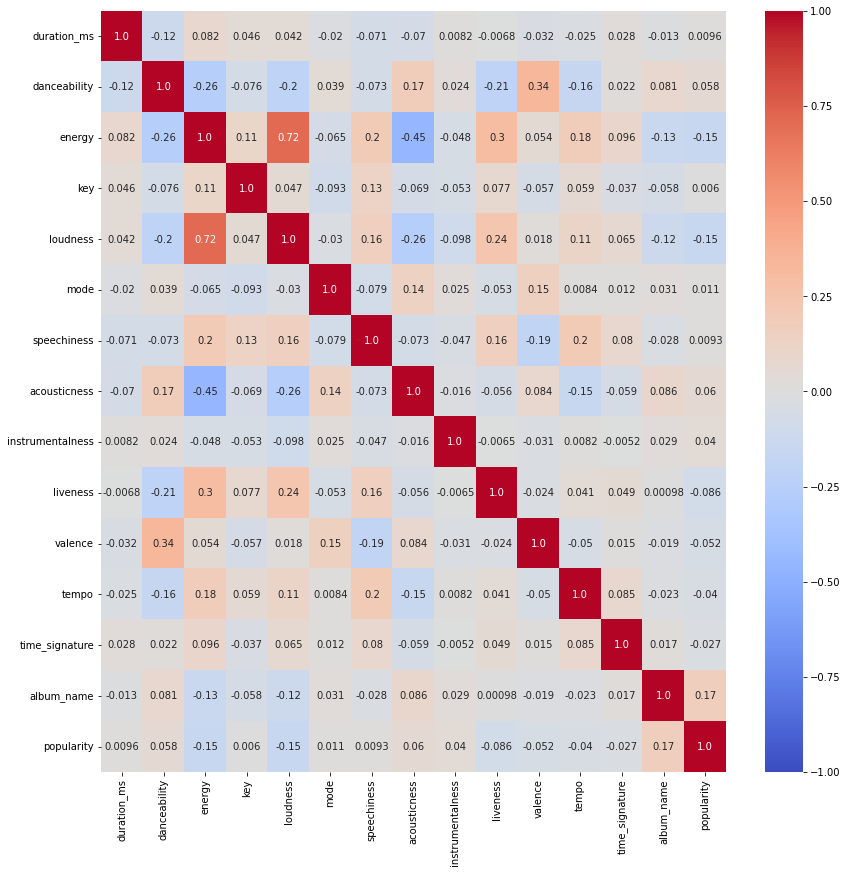

In [20]:
#Heat map
corr = df_norm.corr()
fig, ax = plt.subplots(figsize=(14, 14))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, fmt='.2', cmap= 'coolwarm')

In [21]:
#Very, very, very, very computationally intensive pair plot.
#Run at your own risk
#_=sns.pairplot(data=df_norm)

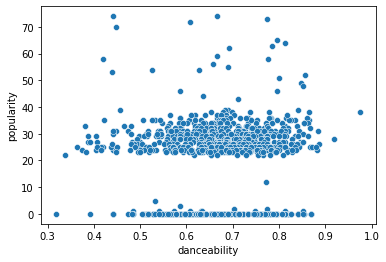

In [22]:
#Single cell of the pairplot
#We only care about correlation with popularity, so we can examine them one by one.
sns.scatterplot(data=df_rem, x='danceability', y='popularity')

In [23]:
#Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop(['popularity'], axis=1), df_norm.popularity, test_size=0.2, random_state=21)
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(200, 14)
(800, 14)
(200,)
(800,)


In [24]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
yhat_test = logreg.predict(X_test)
logreg.score(X_test, y_test)

print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.59      0.38      0.46        89
           1       0.58      0.78      0.67       106
           2       0.00      0.00      0.00         5

    accuracy                           0.58       200
   macro avg       0.39      0.39      0.38       200
weighted avg       0.57      0.58      0.56       200



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

In [25]:
#Neural Net
model = Sequential()

model.add(Dense(units=14, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=7, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=9, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=7, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid', input_dim=X_train.shape[1]))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Summary of our neural net
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 9)                 72        
                                                                 
 dense_3 (Dense)             (None, 7)                 70        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Train our neural net

#Stochastic:
#his = model.fit(X_train.astype('float'), y_train, validation_split=0.1, batch_size=1, epochs=100)

#Mini-batch:
#his = model.fit(X_train.astype('float'), y_train, validation_split=0.1, batch_size=5, epochs=100)

#Full Batch: We only use one tenth for validation, so full_batch = 720
full_batch = X_train.shape[0] * 9 // 10
his = model.fit(X_train.astype('float'), y_train, validation_split=0.1, batch_size=full_batch, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 7.3941 - accuracy: 0.4208 - val_loss: 5.3985 - val_accuracy: 0.4500
Epoch 2/500
1/1 [==============================] - 0s 20ms/step - loss: 5.7935 - accuracy: 0.4208 - val_loss: 4.3737 - val_accuracy: 0.4500
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 4.6915 - accuracy: 0.4208 - val_loss: 3.5498 - val_accuracy: 0.4500
Epoch 4/500
1/1 [==============================] - 0s 20ms/step - loss: 3.8045 - accuracy: 0.4208 - val_loss: 2.8465 - val_accuracy: 0.4500
Epoch 5/500
1/1 [==============================] - 0s 22ms/step - loss: 3.0461 - accuracy: 0.4208 - val_loss: 2.2304 - val_accuracy: 0.4500
Epoch 6/500
1/1 [==============================] - 0s 40ms/step - loss: 2.3801 - accuracy: 0.4208 - val_loss: 1.6906 - val_accuracy: 0.4500
Epoch 7/500
1/1 [==============================] - 0s 22ms/step - loss: 1.7948 - accuracy: 0.4208 - val_loss: 1.2372 - val_accuracy: 0.4625
Epoch 8/500
1/1 [=====

In [27]:
#Test accuracy of our neural net
yhat_test = model.predict(X_test.astype(float))
#Threshold our predictions
yhat= []
for y in yhat_test:
  if y <= 0.33:
    yhat.append(0)
  elif y <= 0.66:
    yhat.append(1)
  else:
    yhat.append(2)

7/7 [==============================] - 0s 1ms/step


In [28]:
print('Model Classification Report:')
print(classification_report(y_test, yhat_test))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.12      0.21        89
           1       0.55      0.97      0.71       106
           2       0.00      0.00      0.00         5

    accuracy                           0.57       200
   macro avg       0.45      0.37      0.31       200
weighted avg       0.64      0.57      0.47       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#List of all our costs throughout the training step
#We'll use this for plotting
print(his.history['val_accuracy'])

[0.44999998807907104, 0.44999998807907104, 0.44999998807907104, 0.44999998807907104, 0.44999998807907104, 0.44999998807907104, 0.4625000059604645, 0.4749999940395355, 0.4124999940395355, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.5249999761581421, 0.52499997615

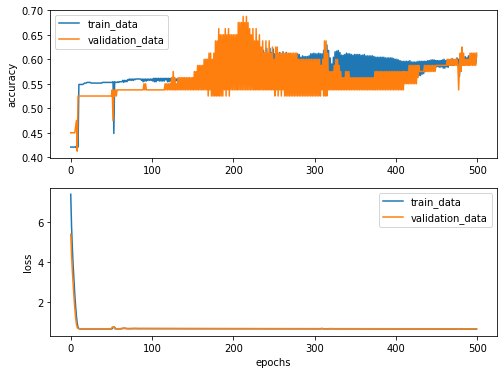

In [30]:
#Initial plot
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))

#Plot performance over training data
ax1.plot(his.history['accuracy'], label='train_data')
ax2.plot(his.history['loss'], label='train_data')

#Plot performance over validation data
ax1.plot(his.history['val_accuracy'], label='validation_data')
ax2.plot(his.history['val_loss'], label='validation_data')

#Axis Lables
ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
#Graph Legends
ax1.legend()
ax2.legend()

In [ ]:
one_hot_encoding = pd.get_dummies(y_train)
y_train = one_hot_encoding
y_train

In [ ]:
#correct model
model = Sequential()

model.add(Dense(units = 30, activation = 'selu', input_dim = X_train.shape[1]))
model.add(Dense(units = 15, activation = 'selu'))
model.add(Dense(units = 10, activation = 'selu'))
model.add(Dense(units = 10, activation = 'selu'))
model.add(Dense(units = 5, activation = 'selu'))
model.add(Dense(units = 3, activation = 'softmax'))

model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
his = model.fit(X_train.astype('float'), y_train, validation_split = 0.1,batch_size = 5, epochs = 200)

In [ ]:
yhat_test = model.predict(X_test.astype(float))
yhat=[]
for y in yhat_test:
  yhat.append(np.argmax(y))
yhat = np.array(yhat)
yhat.shape

In [ ]:
print('Model Classification Report:')
print(classification_report(y_test, yhat))

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

ax1.plot(his.history['accuracy'], label= 'train_data')
ax2.plot(his.history['loss'], label='train_data')

ax1.plot(his.history['val_accuracy'], label= 'validation_data')
ax2.plot(his.history['val_loss'], label='validation_data')

ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()

In [ ]:
# Let's initialize our model
 # Initialising the ANNmodel = Sequential() # Initialising the ANN
model = Sequential()
model.add(Dense(units = 30, activation = 'selu', input_dim = X_train.shape[1]))
model.add(Dense(units = 15, activation = 'selu'))
model.add(Dense(units = 10, activation = 'selu'))
model.add(Dense(units = 10, activation = 'selu'))
# model.add(Dense(units = 7, activation = 'selu'))
model.add(Dense(units = 3, activation = 'softmax'))
model.summary()


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
his = model.fit(X_train.astype('float'), y_train, validation_split = 0.1,batch_size = 5, epochs = 200)

In [ ]:
yhat_test = model.predict(X_test.astype(float))
yhat=[]
for y in yhat_test:
  yhat.append(np.argmax(y))
yhat = np.array(yhat)
yhat.shape

In [ ]:
print('Model Classification Report:')
print(classification_report(y_test, yhat))

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

ax1.plot(his.history['accuracy'], label= 'train_data')
ax2.plot(his.history['loss'], label='train_data')

ax1.plot(his.history['val_accuracy'], label= 'validation_data')
ax2.plot(his.history['val_loss'], label='validation_data')

ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()

In [31]:
# SVM
X_train, X_test, y_train, y_test = train_test_split(df_norm[['album_name', 'key', 'mode']], df_norm.popularity, test_size=0.2, random_state=21)
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(200, 3)
(800, 3)
(200,)
(800,)


In [35]:
#Encode
encoder = OrdinalEncoder() # Encodes each category as integers. From 0 to n_classes - 1
y_encoder = LabelEncoder() # Same functionality but designed for the dependent variable.
NB = CategoricalNB()

encoder.fit(X_train)
y_encoder.fit(y_train)

LabelEncoder()

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)

#Different Kernel Options
#clf = SVC(kernel='linear')
#clf_non = SVC(kernel='sigmoid', gamma=1.0, coef0 = 1)        #gamma, r.
#clf_non = SVC(kernel='poly', degree=6, gamma=1.0, coef0 = 1) #p, gamma, r.
clf_non = SVC(kernel='rbf', gamma=2.0)                        #gamma

clf_non.fit(scaler.transform(X_train), np.asarray(y_train))
#clf.fit(scaler.transform(X_train), np.asarray(y_train))

print(classification_report(y_test, clf_non.predict(scaler.transform(X_test))))

              precision    recall  f1-score   support

           0       0.58      0.49      0.53        89
           1       0.60      0.71      0.65       106
           2       0.00      0.00      0.00         5

    accuracy                           0.59       200
   macro avg       0.39      0.40      0.40       200
weighted avg       0.58      0.59      0.58       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
